https://jeo96.tistory.com/entry/CIFAR-10-CNN%EC%9C%BC%EB%A1%9C-%ED%95%99%EC%8A%B5%ED%95%98%EA%B8%B0-Pytorch

In [1]:
import ssl
import torch
import torch.nn as nn
from torchvision import transforms, datasets

In [2]:
img_size = 224

# Define image size
image_size = (img_size, img_size)  # Replace with your desired image dimensions

# Create data augmentation transforms
data_augmentation = transforms.Compose([
    transforms.ToTensor(),  # Convert image to PyTorch tensor (CHW format)
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # Normalize pixel values (common practice)
    transforms.Resize(image_size),  # Resize image to specified dimensions
    transforms.RandomHorizontalFlip(p=0.5),  # Random horizontal flip with 50% probability
    transforms.RandomRotation(degrees=(-15, 15)),  # Random rotation with range -15 to 15 degrees
    transforms.RandomResizedCrop(image_size, scale=(0.8, 1.0), ratio=(0.75, 1.3333))  # Random resized crop
])

In [16]:
stats = ((0.5074,0.4867,0.4411),(0.2011,0.1987,0.2025))
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32,padding=4,padding_mode="reflect"),
    transforms.ToTensor(),
    transforms.Normalize(*stats)
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(*stats)
])

In [3]:
BATCH_SIZE = 32
train_dataset = datasets.CIFAR100(root="./data/",
                                 train=True,
                                 download=True,
                                 transform=data_augmentation)

test_dataset = datasets.CIFAR100(root="./data/",
                                train=False,
                                download=True,
                                transform=data_augmentation)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=BATCH_SIZE,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=BATCH_SIZE,
                                          shuffle=False)

print(train_loader.dataset)

Files already downloaded and verified
Files already downloaded and verified
Dataset CIFAR100
    Number of datapoints: 50000
    Root location: ./data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
               RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
           )


In [4]:
for (X_train, Y_train) in train_loader:
    print(f"X_train: {X_train.size()} type: {X_train.type()}")
    print(f"Y_train: {Y_train.size()} type: {Y_train.type()}")
    break

X_train: torch.Size([32, 3, 224, 224]) type: torch.FloatTensor
Y_train: torch.Size([32]) type: torch.LongTensor


In [5]:
X_train[0].shape

torch.Size([3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])


(-0.5, 223.5, 223.5, -0.5)

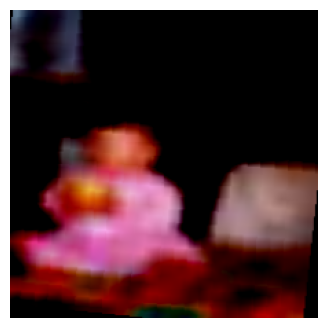

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from einops import rearrange, reduce, repeat

plt.figure(figsize=(4,4))
image = X_train[np.random.choice(range(X_train.shape[0]))]
print(image.shape) #(32, 32, 3)
image = rearrange(image, 'c h w -> h w c')
plt.imshow(image)
#plt.imshow(image.astype("uint8"))
plt.axis("off")

In [7]:
BATCH_SIZE = 32
train_dataset = datasets.CIFAR10(root="./data/",
                                 train=True,
                                 download=True,
                                 transform=transforms.ToTensor())

test_dataset = datasets.CIFAR10(root="./data/",
                                train=False,
                                download=True,
                                transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=BATCH_SIZE,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=BATCH_SIZE,
                                          shuffle=False)

print(train_loader.dataset)
# Dataset CIFAR10
#    Number of datapoints: 50000
#    Root location: ./data/
#    Split: Train
#    StandardTransform
#    Transform: ToTensor()

Files already downloaded and verified
Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data/
    Split: Train
    StandardTransform
Transform: ToTensor()


In [8]:
for (X_train, Y_train) in train_loader:
    print(f"X_train: {X_train.size()} type: {X_train.type()}")
    print(f"Y_train: {Y_train.size()} type: {Y_train.type()}")
    break
# X_train: torch.Size([32, 3, 32, 32]) type: torch.FloatTensor
# Y_train: torch.Size([32]) type: torch.LongTensor

X_train: torch.Size([32, 3, 32, 32]) type: torch.FloatTensor
Y_train: torch.Size([32]) type: torch.LongTensor


In [9]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(
            in_channels=3,
            out_channels=8,
            kernel_size=3,
            padding=1)
        self.conv2 = nn.Conv2d(
            in_channels=8,
            out_channels=16,
            kernel_size=3,
            padding=1)
        self.pool = nn.MaxPool2d(
            kernel_size=2,
            stride=2
        )
        self.fc1 = nn.Linear(8 * 8 * 16, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.conv1(x)
        #print(f"conv1:{x.shape}") #conv1:torch.Size([32, 8, 32, 32])
        x = torch.relu(x)
        x = self.pool(x)
        #print(x.shape) # torch.Size([32, 8, 16, 16])
        x = self.conv2(x)
        #print(f"conv2: {x.shape}") #conv2: torch.Size([32, 16, 16, 16])
        x = torch.relu(x)
        x = self.pool(x)
        #print(x.shape) #torch.Size([32, 16, 8, 8])

        x = x.view(-1, 8 * 8 * 16)
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = torch.log_softmax(x, dim=1)
        return x

In [10]:
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

print(f"Using PyTorch version: {torch.__version__}, Device: {DEVICE}")

model = CNN().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

Using PyTorch version: 2.2.0, Device: cuda


In [11]:
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print(
                f"train Epoch: {Epoch} [{batch_idx * len(image)}/{len(train_loader.dataset)}({100. * batch_idx / len(train_loader):.0f}%)]\tTrain Loss: {loss.item()}")

In [12]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim=True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [13]:
EPOCHS = 10
for Epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval=200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print(f"\n[EPOCH: {Epoch}]\tTest Loss: {test_loss:.4f}\tTest Accuracy: {test_accuracy} % \n")

train Epoch: 1 [0/50000(0%)]	Train Loss: 2.3194825649261475
train Epoch: 1 [6400/50000(13%)]	Train Loss: 2.0293099880218506
train Epoch: 1 [12800/50000(26%)]	Train Loss: 1.7392578125
train Epoch: 1 [19200/50000(38%)]	Train Loss: 1.7199267148971558
train Epoch: 1 [25600/50000(51%)]	Train Loss: 1.4983694553375244
train Epoch: 1 [32000/50000(64%)]	Train Loss: 1.6142563819885254
train Epoch: 1 [38400/50000(77%)]	Train Loss: 1.4867746829986572
train Epoch: 1 [44800/50000(90%)]	Train Loss: 1.145916223526001

[EPOCH: 1]	Test Loss: 0.0457	Test Accuracy: 46.49 % 

train Epoch: 2 [0/50000(0%)]	Train Loss: 1.582071304321289
train Epoch: 2 [6400/50000(13%)]	Train Loss: 1.4776508808135986
train Epoch: 2 [12800/50000(26%)]	Train Loss: 1.2889397144317627
train Epoch: 2 [19200/50000(38%)]	Train Loss: 1.2899941205978394
train Epoch: 2 [25600/50000(51%)]	Train Loss: 1.3815793991088867
train Epoch: 2 [32000/50000(64%)]	Train Loss: 1.2536523342132568
train Epoch: 2 [38400/50000(77%)]	Train Loss: 1.2242213

In [14]:
import ssl
import torch
import torch.nn as nn
from torchvision import transforms, datasets

# ssl._create_default_https_context = ssl._create_unverified_context


BATCH_SIZE = 32
train_dataset = datasets.CIFAR100(root="./data/",
                                 train=True,
                                 download=True,
                                 transform=transforms.ToTensor())

test_dataset = datasets.CIFAR100(root="./data/",
                                train=False,
                                download=True,
                                transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=BATCH_SIZE,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=BATCH_SIZE,
                                          shuffle=False)

print(train_loader.dataset)

for (X_train, Y_train) in train_loader:
    print(f"X_train: {X_train.size()} type: {X_train.type()}")
    print(f"Y_train: {Y_train.size()} type: {Y_train.type()}")
    break


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(
            in_channels=3,
            out_channels=8,
            kernel_size=3,
            padding=1)
        self.conv2 = nn.Conv2d(
            in_channels=8,
            out_channels=16,
            kernel_size=3,
            padding=1)
        self.pool = nn.MaxPool2d(
            kernel_size=2,
            stride=2
        )
        self.fc1 = nn.Linear(8 * 8 * 16, 64)
        self.fc2 = nn.Linear(64, 32)
        #self.fc3 = nn.Linear(32, 10) # CIFAR10
        self.fc3 = nn.Linear(32, 100) # CIFAR100

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = self.pool(x)

        x = x.view(-1, 8 * 8 * 16)
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = torch.log_softmax(x, dim=1)
        return x


DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

print(f"Using PyTorch version: {torch.__version__}, Device: {DEVICE}")

model = CNN().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()


def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print(
                f"train Epoch: {Epoch} [{batch_idx * len(image)}/{len(train_loader.dataset)}({100. * batch_idx / len(train_loader):.0f}%)]\tTrain Loss: {loss.item()}")


def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim=True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

EPOCHS = 10
for Epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval=200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print(f"\n[EPOCH: {Epoch}]\tTest Loss: {test_loss:.4f}\tTest Accuracy: {test_accuracy} % \n")

Files already downloaded and verified
Files already downloaded and verified
Dataset CIFAR100
    Number of datapoints: 50000
    Root location: ./data/
    Split: Train
    StandardTransform
Transform: ToTensor()
X_train: torch.Size([32, 3, 32, 32]) type: torch.FloatTensor
Y_train: torch.Size([32]) type: torch.LongTensor
Using PyTorch version: 2.2.0, Device: cuda
train Epoch: 1 [0/50000(0%)]	Train Loss: 4.602910041809082
train Epoch: 1 [6400/50000(13%)]	Train Loss: 4.314922332763672
train Epoch: 1 [12800/50000(26%)]	Train Loss: 4.195239543914795
train Epoch: 1 [19200/50000(38%)]	Train Loss: 4.191533088684082
train Epoch: 1 [25600/50000(51%)]	Train Loss: 4.124587059020996
train Epoch: 1 [32000/50000(64%)]	Train Loss: 3.833339214324951
train Epoch: 1 [38400/50000(77%)]	Train Loss: 3.914860725402832
train Epoch: 1 [44800/50000(90%)]	Train Loss: 3.8043313026428223

[EPOCH: 1]	Test Loss: 0.1201	Test Accuracy: 10.18 % 

train Epoch: 2 [0/50000(0%)]	Train Loss: 3.8887555599212646
train Epoch: